# group number 30-cyber attacks in the world 
---
- group members: Chany Youngster, Esty Carmiel, Adiel Atago.

- the data taken from https://www.kaggle.com/datasets/teamincribo/cyber-security-attacks
and from 'KELA group' https://github.com/estycar/project12/blob/main/cyber_attack.csv

- The data describes cyber attack data on companies around the world, the types of attack, its timing, its consequences and the methods of action against it.



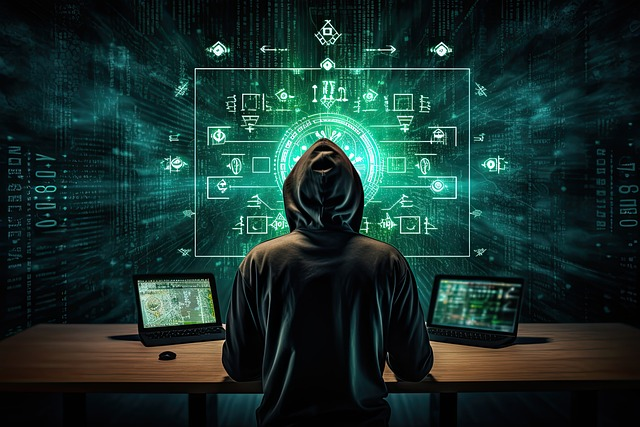

## read first!
### we used libraries which needs to be installed so you need to run all the cells from beginning to end in order to make everything works.


In [1]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import calendar
import plotly.express as px
from wordcloud import WordCloud
from collections import Counter
from numpy import polyfit

In [3]:
url="https://raw.githubusercontent.com/estycar/project12/main/cyber_attack._new.csv"
df=pd.read_csv(url)

### get to know our data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28113 entries, 0 to 28112
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               28113 non-null  object 
 1   Source IP Address       28113 non-null  object 
 2   Destination IP Address  28113 non-null  object 
 3   Source Port             28113 non-null  int64  
 4   Destination Port        28113 non-null  int64  
 5   Protocol                28113 non-null  object 
 6   Packet Length           28113 non-null  int64  
 7   Packet Type             28113 non-null  object 
 8   Traffic Type            28113 non-null  object 
 9   Payload Data            28113 non-null  object 
 10  Malware Indicators      14081 non-null  object 
 11  Anomaly Scores          28113 non-null  float64
 12  Alerts/Warnings         13994 non-null  object 
 13  Attack Type             28113 non-null  object 
 14  Attack Signature        28113 non-null

In [5]:
df.shape

(28113, 25)

In [6]:
df.columns

Index(['Timestamp', 'Source IP Address', 'Destination IP Address',
       'Source Port', 'Destination Port', 'Protocol', 'Packet Length',
       'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators',
       'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature',
       'Action Taken', 'Severity Level', 'User Information',
       'Device Information', 'Network Segment', 'Geo-location Data',
       'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source'],
      dtype='object')

unnecessary columns:

In [7]:
df=df.drop('Source IP Address', axis=1)
df=df.drop('Destination IP Address', axis=1)

In [8]:
df.head(3)

Timestamp  Source Port  Destination Port Protocol  Packet Length  \
0  09/08/2020 01:01        51161             16489     ICMP           1371   
1  03/09/2021 08:08        65012             24432      TCP            637   
2  29/04/2022 23:31        55733             20183     ICMP            187   

  Packet Type Traffic Type                                       Payload Data  \
0        Data          FTP  Iure quae repellat iste quas inventore illo cu...   
1        Data          FTP  Ut non unde consequatur veniam. Ipsum repellat...   
2        Data          DNS  Vero consectetur iure error nam numquam minus....   

  Malware Indicators  Anomaly Scores  ... Action Taken Severity Level  \
0                NaN            5.62  ...      Ignored         Medium   
1                NaN           72.08  ...      Ignored           High   
2       IoC Detected           83.28  ...      Ignored         Medium   

  User Information                                 Device Information  \
0     Kanav D’Alia  Mozilla/5.0 (X11; Linux i686) AppleWebKit/531....   
1   Dhanush Cheema  Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_5 ...   
2       Akarsh Rau  Mozilla/5.0 (Linux; Android 7.0) AppleWebKit/5...   

  Network Segment        Geo-location Data Proxy Information Firewall Logs  \
0       Segment B    Noida, Madhya Pradesh               NaN      Log Data   
1       Segment A      Karnal, Maharashtra       97.44.66.28      Log Data   
2       Segment B  Secunderabad, Telangana     43.225.218.71      Log Data   

  IDS/IPS Alerts Log Source  
0     Alert Data     Server  
1     Alert Data   Firewall  
2            NaN   Firewall  

[3 rows x 23 columns]

In [9]:
dict = df.nunique().to_dict()
pd.DataFrame(dict, index=["unique count"]).transpose()

unique count
Timestamp                  27909
Source Port                22778
Destination Port           22758
Protocol                       3
Packet Length               1437
Packet Type                    2
Traffic Type                   3
Payload Data               28113
Malware Indicators             1
Anomaly Scores              9401
Alerts/Warnings                1
Attack Type                    3
Attack Signature               2
Action Taken                   3
Severity Level                 3
User Information           24210
Device Information         22733
Network Segment                3
Geo-location Data           8446
Proxy Information          14117
Firewall Logs                  1
IDS/IPS Alerts                 1
Log Source                     2

### Analysis:

#### There are three types of attacks:
    

##### **Malware** - This type of attack is aimed at obtaining data, and financial gain mainly through ransom.
##### **DDoS** - Designed to flood the intended target's devices and network with fake internet traffic, making them inaccessible to users.
##### **Instrusion** - Its purpose is mainly to steal personal information and use it without permission.

In [10]:
pd.DataFrame(df['Attack Type'].value_counts())

Attack Type
Malware          10823
Intrusion         9431
DDoS              7859

### malware is the most common attack type!
##### lets see it in graph:

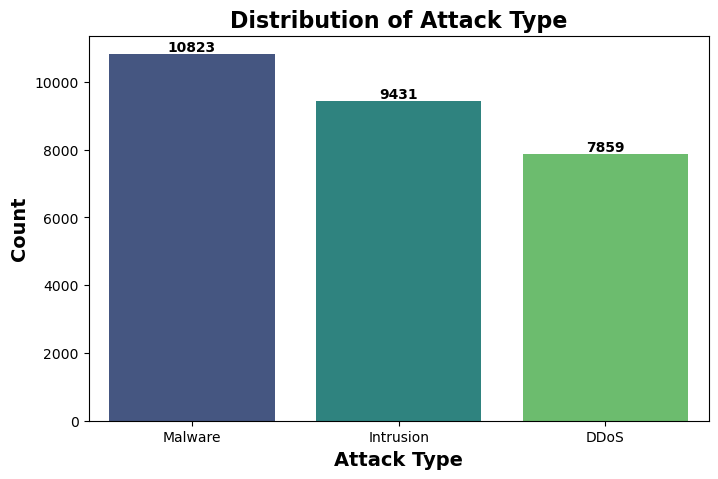

In [11]:
attack_counts = df['Attack Type'].value_counts()
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=attack_counts.index, y=attack_counts, palette='viridis')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xlabel('Attack Type', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Distribution of Attack Type', fontsize=16,fontweight='bold')

plt.show()


#### we try to understand why malware is the most common attack type.

##### After each attack on each company there are three types of action:
- Ignorance
- Logged
- Blocked-meaning the attack was successful and the company was blocked from use.


##### lets see what happend after the attacks in each attack type:

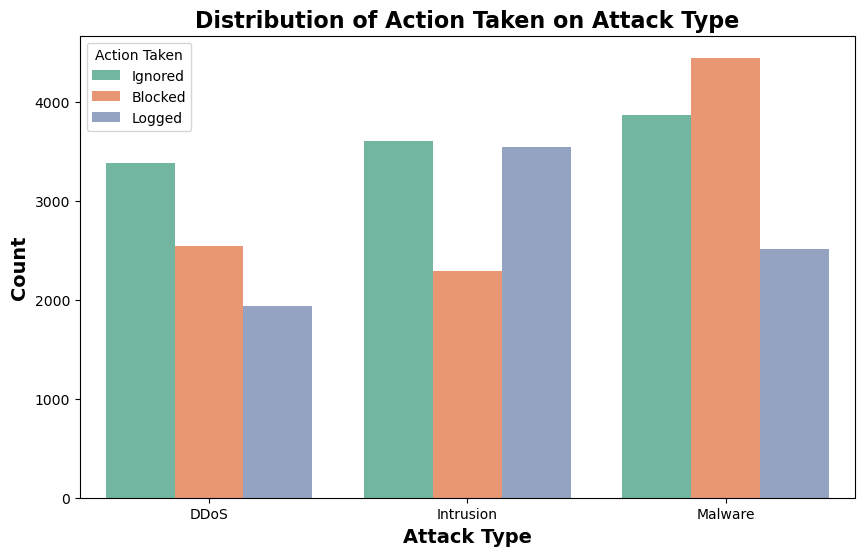

In [12]:
plt.figure(figsize=(10, 6))  
sns.countplot(data=df, x='Attack Type', hue='Action Taken', palette='Set2') 
plt.xlabel('Attack Type', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.legend(title='Action Taken')
plt.title('Distribution of Action Taken on Attack Type', fontsize=16,fontweight='bold')
plt.show()

### We see from the graph that the type of attack that has the most blocks is malware. This is the most successful type of attack.

#### Lets see it in percentage:

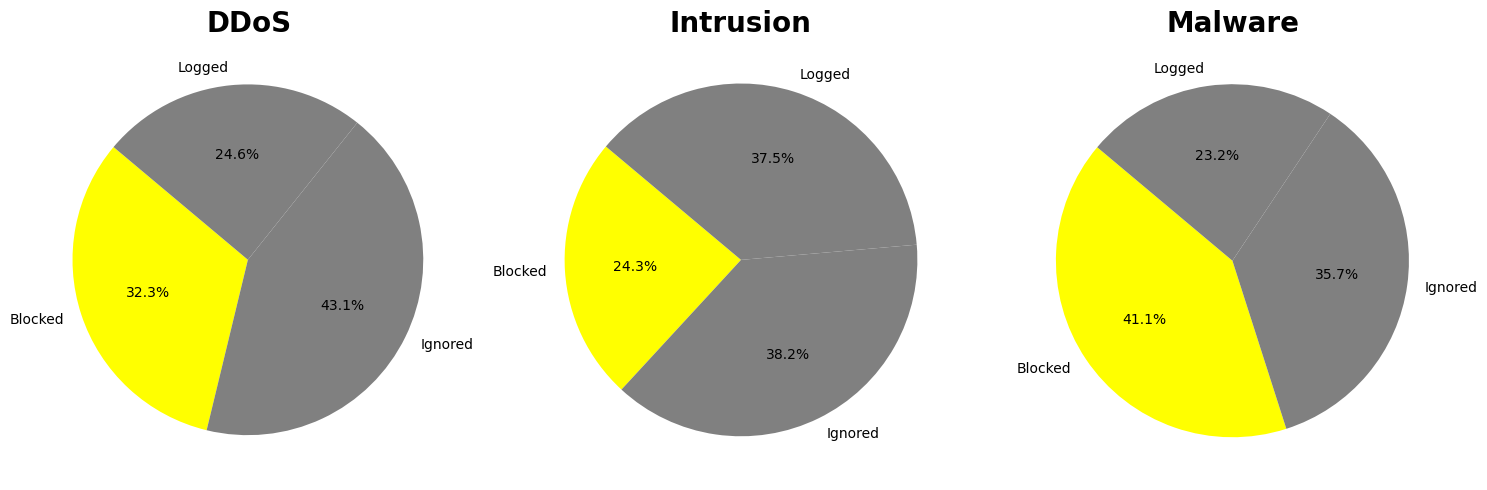

In [13]:
colors = {'blocked': 'yellow', 'ignored': 'gray', 'logged': 'gray'}
grouped = df.groupby(['Attack Type', 'Action Taken']).size().unstack(fill_value=0)
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

for i, attack_type in enumerate(percentages.index):
    attack_row = percentages.loc[attack_type]
    axs[i].pie(attack_row, labels=attack_row.index, autopct='%1.1f%%', startangle=140, colors=[colors[action.lower()] for action in attack_row.index])
    axs[i].set_title(attack_type,fontweight='bold',fontsize=20)
    axs[i].axis('equal')

plt.tight_layout()
plt.show()


#### We clearly see that the highest success rate happens with malware.

# conclution 1:

### After seeing that malware is the most common type of attack, we wanted to understand why. We checked the success rates of each type of attack, and discovered that the highest success rates are with **Malware**. Malware is the most successful method of attack

(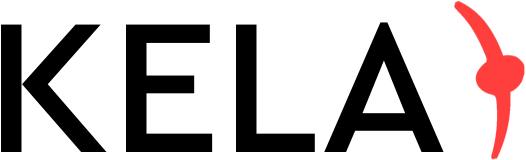



# 'kela' group:

##### The 'kela' company deals with the protection of companies against cyber threats.
##### They provide up-to-date intelligence and enable security teams to effectively identify, prioritize and mitigate digital security risks.
##### The kela company mainly focuses on the type of successful ****Malware**** attack and within it on ransomware victims.

hear data from the company:

In [14]:
url2="https://raw.githubusercontent.com/estycar/project12/main/cyber_attack%20.%20(3).csv"
df2= pd.read_csv(url2)

In [15]:
df2.head()

Victim name Geography  \
0  The National Wild Turkey Federation        us   
1   Sutterfield Financial Group, Inc.         us   
2                    ESR Motor Systems        us   
3   Dae Myung Rainwear Lanka (PVT) LTD        lk   
4                     Centre Concrete         us   

                                Sector                         Date  \
0                Professional Services  Aug 11, 2021 - 02:37:12.000   
1                   Financial Services  Aug 10, 2021 - 15:20:53.000   
2                           Automotive   Aug 9, 2021 - 01:40:15.000   
3  Manufacturing & Industrial Products  Aug 12, 2021 - 06:13:33.000   
4  Manufacturing & Industrial Products  May 27, 2021 - 21:00:00.000   

  Threat Actor name  Unnamed: 5  Unnamed: 6  
0          LockBit          NaN         NaN  
1              Hive         NaN         NaN  
2           LockBit         NaN         NaN  
3          Ragnarok         NaN         NaN  
4                LV         NaN         NaN

In [16]:
df2.columns

Index(['Victim name', 'Geography', 'Sector', 'Date', 'Threat Actor name',
       'Unnamed: 5', 'Unnamed: 6'],
      dtype='object')

In [17]:
df2=df2.drop('Unnamed: 5',axis=1)
df2=df2.drop('Unnamed: 6',axis=1)

In [18]:
df2.head()

Victim name Geography  \
0  The National Wild Turkey Federation        us   
1   Sutterfield Financial Group, Inc.         us   
2                    ESR Motor Systems        us   
3   Dae Myung Rainwear Lanka (PVT) LTD        lk   
4                     Centre Concrete         us   

                                Sector                         Date  \
0                Professional Services  Aug 11, 2021 - 02:37:12.000   
1                   Financial Services  Aug 10, 2021 - 15:20:53.000   
2                           Automotive   Aug 9, 2021 - 01:40:15.000   
3  Manufacturing & Industrial Products  Aug 12, 2021 - 06:13:33.000   
4  Manufacturing & Industrial Products  May 27, 2021 - 21:00:00.000   

  Threat Actor name  
0          LockBit   
1              Hive  
2           LockBit  
3          Ragnarok  
4                LV

### Description of the columns (Table of content)
- **victim name** - The name of the company that attacked
- **Geography** -The country where the company is located
- **Sector** - The field in which the company is engaged
- **Date** - The date the attack occurred
- **Treat Actor name** - The name of the attacker type

In [19]:
dict = df2.nunique().to_dict()
pd.DataFrame(dict, index=["unique count"]).transpose()

unique count
Victim name               12036
Geography                   153
Sector                       25
Date                       3020
Threat Actor name           201

### Let's focus on the date column

In [20]:
pd.DataFrame(df2['Date'])   

Date
0      Aug 11, 2021 - 02:37:12.000
1      Aug 10, 2021 - 15:20:53.000
2       Aug 9, 2021 - 01:40:15.000
3      Aug 12, 2021 - 06:13:33.000
4      May 27, 2021 - 21:00:00.000
...                            ...
12326  Jan 31, 2024 - 00:00:00.000
12327  Jan 23, 2024 - 00:00:00.000
12328   Feb 2, 2024 - 00:00:00.000
12329  Jan 23, 2024 - 00:00:00.000
12330   Feb 5, 2024 - 00:00:00.000

[12331 rows x 1 columns]

#### Let's see how many attacks happened each month between 2020-2024

In [21]:

df2['Date'] = pd.to_datetime(df2['Date'])
attack_counts = df2.pivot_table(index=df2['Date'].dt.month, columns=df2['Date'].dt.year, aggfunc='size', fill_value=0)
attack_counts.index = pd.date_range(start='2023-01-01', periods=12, freq='M').strftime('%B')
(attack_counts)


Date       2020  2021  2022  2023  2024
January      12   144   161   213   270
February     20   174   222   289    35
March        46   207   356   446     0
April        45   203   300   364     0
May          83   293   219   355     0
June         92   222   169   524     0
July        116   181   251   508     0
August      155   247   205   397     0
September   246   255   262   453     0
October     203   352   299   358     0
November    251   372   236   486     0
December    188   251   262   333     0

#### Let's sum up the attacks

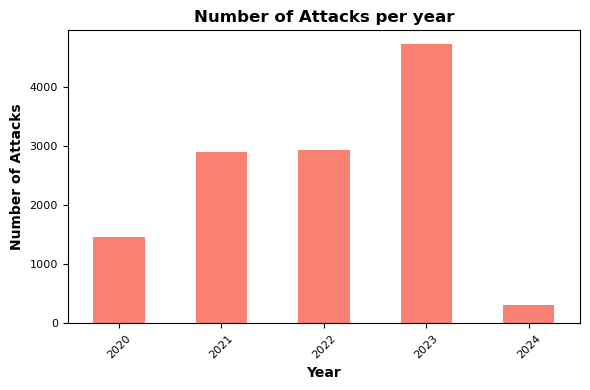

In [22]:
fig, ax = plt.subplots(figsize=(6, 4))
attack_counts.sum().plot(kind='bar', color='salmon')
plt.title('Number of Attacks per year', fontsize=12,fontweight='bold')
plt.xlabel('Year', fontsize=10,fontweight='bold')
plt.ylabel('Number of Attacks', fontsize=10, fontweight='bold')  
plt.xticks(rotation=45)
plt.tick_params(axis='both', labelsize=8)

plt.tight_layout()
plt.show()


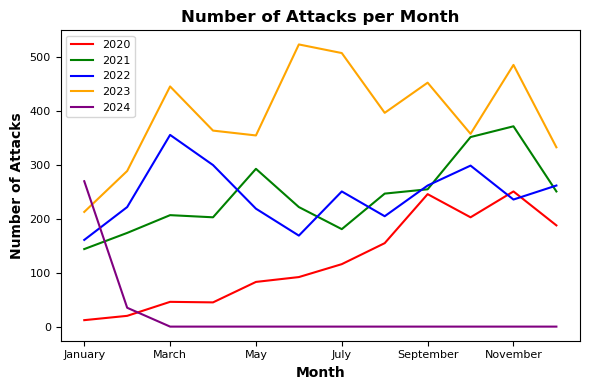

In [23]:
fig, ax = plt.subplots(figsize=(6, 4))
attack_counts.plot(ax=ax, color=['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta', 'olive', 'gold'])
plt.title('Number of Attacks per Month', fontsize=12,fontweight='bold')
plt.xlabel('Month', fontsize=10,fontweight='bold')
plt.ylabel('Number of Attacks', fontsize=10,fontweight='bold')
plt.legend(loc='upper left', fontsize=8)
plt.tick_params(axis='both', labelsize=8)

plt.tight_layout()
plt.show()


### 2023 is The year with the most attacks.

##### lets see what happen at 2023:

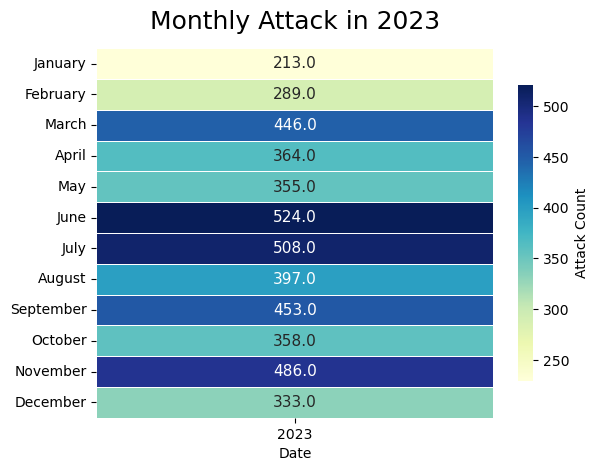

In [24]:
df2['Date'] = pd.to_datetime(df2['Date'])
attack_counts = df2[df2['Date'].dt.year == 2023].pivot_table(index=df2['Date'].dt.month, columns=df2['Date'].dt.year, aggfunc='size', fill_value=0)
attack_counts.index = pd.date_range(start='2023-01-01', periods=12, freq='M').strftime('%B')
ax = sns.heatmap(attack_counts, cmap='YlGnBu', robust=True,fmt='.1f',annot=True,linewidths=.5,annot_kws={'size':11},cbar_kws={'shrink':.8,'label':'Attack Count'})                       
    
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=10)
plt.title('Monthly Attack in 2023', fontdict={'fontsize':18}, pad=14)

plt.show()

### We see that **June** is The most successful month for an attack.

##### Lets see how much attacks happen in each day in June:

In [25]:
june_2023_attacks_with_day_names = df2[(df2['Date'].dt.year == 2023) & (df2['Date'].dt.month == 6)].pivot_table(index=df2['Date'].dt.day_name(), aggfunc='size', fill_value=0)

(june_2023_attacks_with_day_names)

Date
Friday       98
Monday       83
Saturday     48
Sunday       31
Thursday     76
Tuesday      91
Wednesday    97
dtype: int64

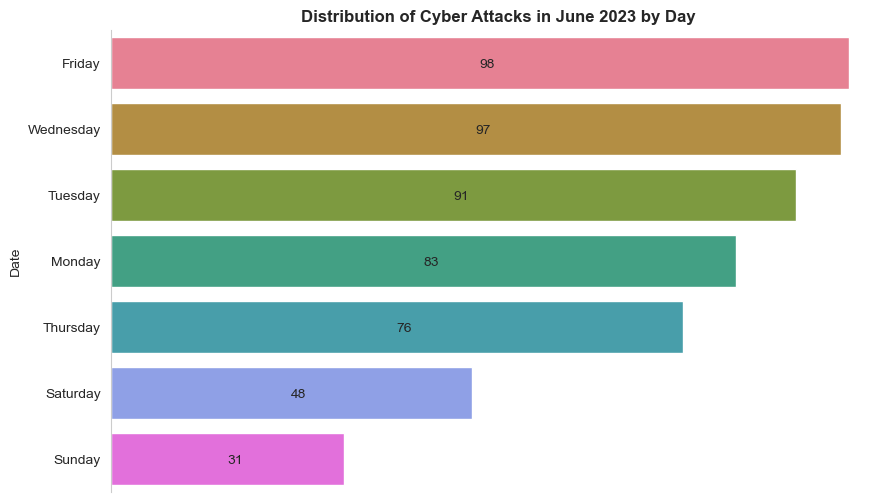

In [26]:
june_2023_attacks_with_day_names = df2[(df2['Date'].dt.year == 2023) & (df2['Date'].dt.month == 6)].pivot_table(index=df2['Date'].dt.day_name(), aggfunc='size', fill_value=0)
june_2023_attacks_with_day_names = june_2023_attacks_with_day_names.sort_values(ascending=False)
colors = sns.color_palette('husl', len(june_2023_attacks_with_day_names))

sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=june_2023_attacks_with_day_names.reset_index(), y='Date', x=0, palette=colors)    
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()    
    ax.annotate(f'{width:.0f}', (x + width/2, y + height/2), ha='left', va='center_baseline')

ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.set_visible(False)  
ax.yaxis.set_tick_params(width=0)
   
plt.title("Distribution of Cyber Attacks in June 2023 by Day",fontweight='bold')
plt.show()

### Let's see at which hours the most attacks took place each day in June 2023:

In [27]:
df2['Date'] = pd.to_datetime(df2['Date'])  
df2['year-month'] = df2['Date'].dt.to_period('M') 
df2['hour'] = df2['Date'].dt.strftime('%H:%M:%S')  
df2['day_of_week'] = df2['Date'].dt.day_name()  
df2[['hour', 'day_of_week']]

hour day_of_week
0      02:37:12   Wednesday
1      15:20:53     Tuesday
2      01:40:15      Monday
3      06:13:33    Thursday
4      21:00:00    Thursday
...         ...         ...
12326  00:00:00   Wednesday
12327  00:00:00     Tuesday
12328  00:00:00      Friday
12329  00:00:00     Tuesday
12330  00:00:00      Monday

[12331 rows x 2 columns]

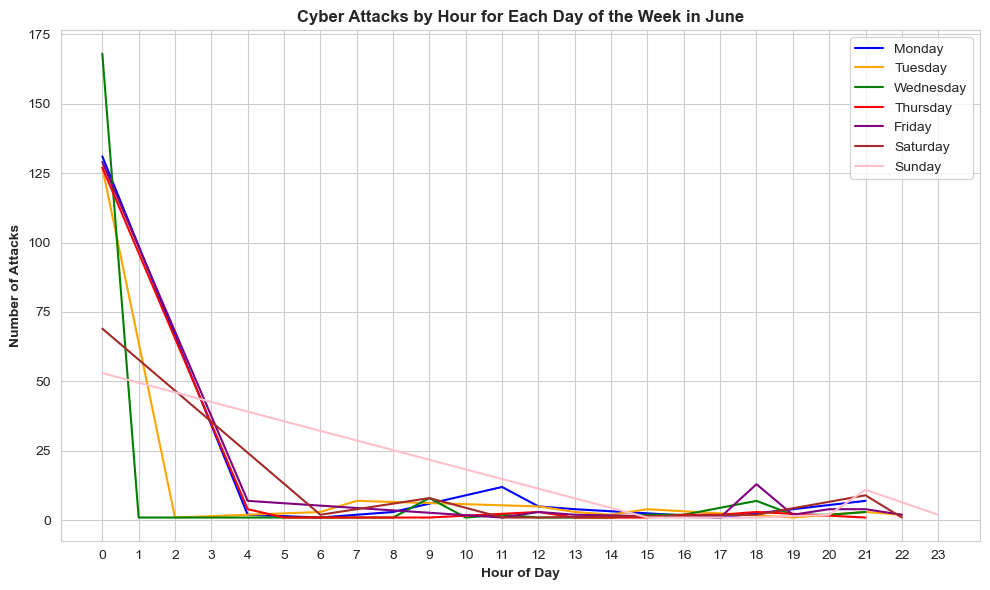

In [28]:
df2['Date'] = pd.to_datetime(df2['Date'])
df2_june = df2[(df2['Date'].dt.month == 6)]
plt.figure(figsize=(10, 6))
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink']

for day, color in zip(range(7), colors):
    day_attacks = df2_june[df2_june['Date'].dt.dayofweek == day]
    attacks_by_hour = day_attacks.groupby(day_attacks['Date'].dt.hour).size()
    plt.plot(attacks_by_hour.index, attacks_by_hour.values, label=day_attacks['Date'].dt.day_name().iloc[0], color=color)
    
plt.title('Cyber Attacks by Hour for Each Day of the Week in June',fontweight='bold')
plt.xlabel('Hour of Day',fontweight='bold')
plt.ylabel('Number of Attacks',fontweight='bold')
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##### From the two graphs we can see that Friday is the day when the most attacks happen and in addition a significant majority of the attacks happen at 12 o'clock at night.

# conclusion 2:

#### We focused on the year 2023 when the most attacks happened and from that we tried to see which month, day and time are the most attacked. After investigating the data, it can be seen that the most cyber attacks happen on Fridays at 12 midnight in June.

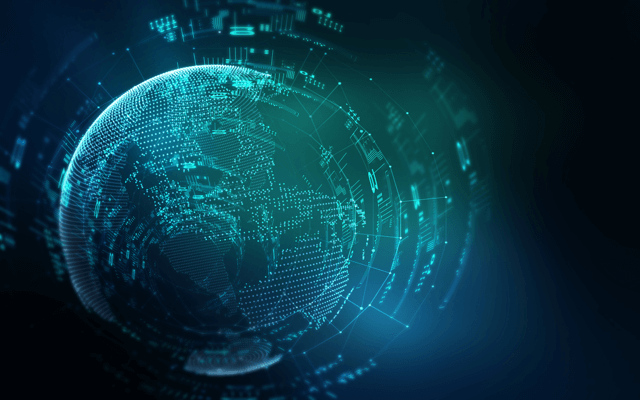

## Geography and Sector:

In [29]:
pd.DataFrame(df2['Geography'].value_counts())

Geography
us       5864
gb        716
ca        611
de        517
fr        507
..        ...
al          1
md          1
ag          1
uz          1
gm          1

[153 rows x 1 columns]

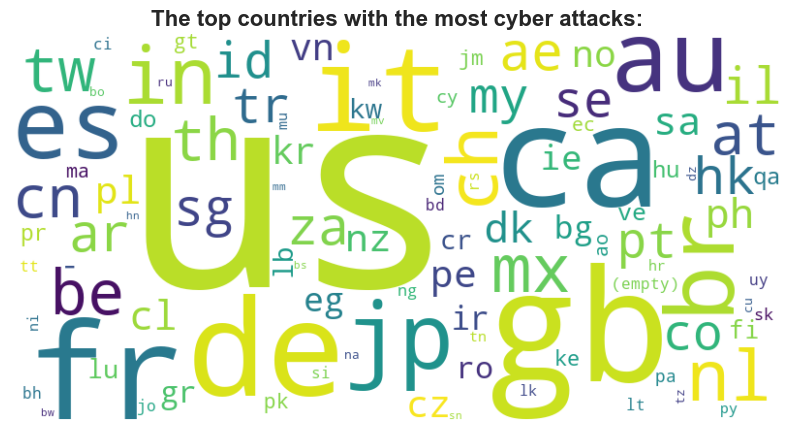

In [30]:
attack_counts = Counter(df2['Geography'])
top_countries = sorted(attack_counts.items(), key=lambda x: x[1], reverse=True)[:100]
top_countries_dict = {country: count for country, count in top_countries}
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_countries_dict)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('The top countries with the most cyber attacks:', fontsize=16,fontweight='bold')
plt.show()

### USA is the country where most of the attacks take place.

In [31]:
df_filtered = df2[(df2['Geography'].notna() & (df2['Geography'] != '-')) & (df2['Sector'].notna() & (df2['Sector'] != '-'))]
df_filtered[['Sector', 'Geography']]

Sector Geography
0                    Professional Services        us
1                       Financial Services        us
2                               Automotive        us
3      Manufacturing & Industrial Products        lk
4      Manufacturing & Industrial Products        us
...                                    ...       ...
12326  Manufacturing & Industrial Products        se
12327                      Food & Beverage        us
12328                Professional Services        bb
12329  Manufacturing & Industrial Products        gb
12330                Transport & Logistics        pt

[12290 rows x 2 columns]

##### Focus on US:

In [32]:
df_filtered = df2[(df2['Geography'].notna() & (df2['Geography'] != '-')) & (df2['Sector'].notna() & (df2['Sector'] != '-'))]
df_filtered = df_filtered[df_filtered['Geography'] == 'us']
df_filtered[['Sector', 'Geography']]


Sector Geography
0                    Professional Services        us
1                       Financial Services        us
2                               Automotive        us
4      Manufacturing & Industrial Products        us
5                    Professional Services        us
...                                    ...       ...
12320                           Technology        us
12321                            Education        us
12322  Manufacturing & Industrial Products        us
12325                Professional Services        us
12327                      Food & Beverage        us

[5855 rows x 2 columns]

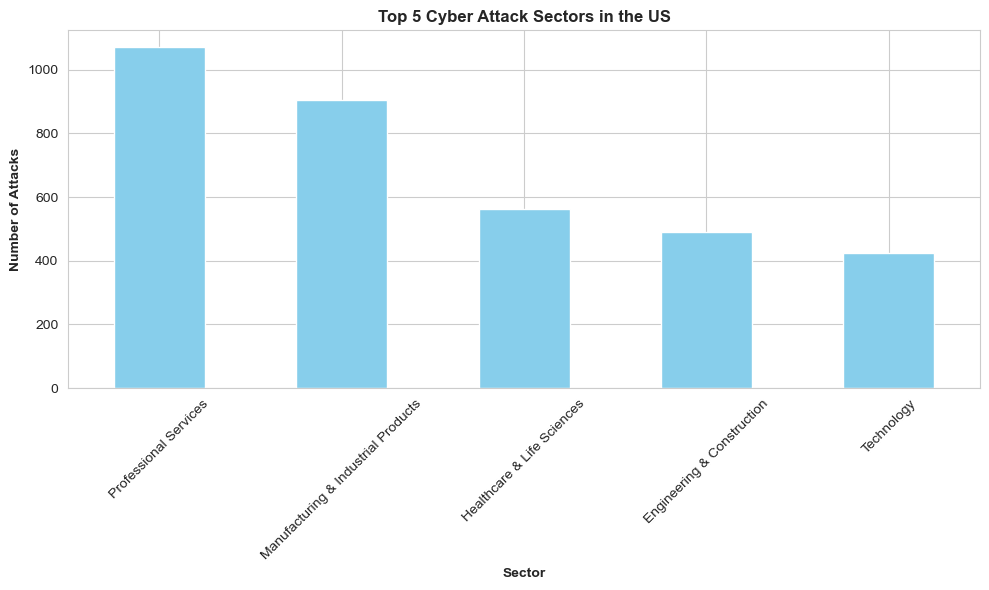

In [33]:
us_attacks = df2[df2['Geography'] == 'us']
us_attacks = us_attacks.dropna(subset=['Sector'])
attacks_by_sector = us_attacks['Sector'].value_counts().nlargest(5)

plt.figure(figsize=(10, 6))
attacks_by_sector.plot(kind='bar', color='skyblue')
plt.title('Top 5 Cyber Attack Sectors in the US',fontweight='bold')
plt.xlabel('Sector',fontweight='bold')
plt.ylabel('Number of Attacks',fontweight='bold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# conclusion 3:

#### After seeing that most of the attacks take place in the US, we checked which types of companies are most attacked in the US and found that companies dealing in **'Professional Services'** in the **US** they are the most attacked.

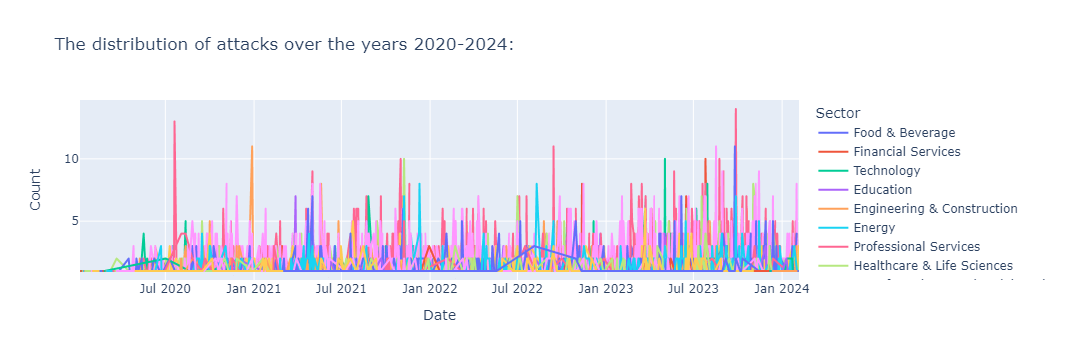

In [34]:
df2['Date'] = pd.to_datetime(df2['Date'])

fig = px.line(df2.groupby([df2['Date'].dt.date, 'Sector']).size().reset_index(name='Count'), 
              x='Date',
              y='Count',
              color='Sector',
              title='The distribution of attacks over the years 2020-2024:')
fig.show()

##### Now, a bonus from us **;)**

## prediction:

#### lets predict how much attacks will be at 2024:

In [35]:
years = [2020, 2021, 2022, 2023]
attacks = [1357, 2901, 2942, 4726]

model = polyfit(years, attacks, 1)
year_2024 = 2024
predicted_attacks = model[0] * year_2024 + model[1]

print("The estimated number of attacks in 2024 is:", int(predicted_attacks))


The estimated number of attacks in 2024 is: 5518


#### Now try yours data **;)**

In [ ]:
def predict_attacks(years, attacks, prediction_year):
    if len(years) != len(attacks):
        raise ValueError("The number of years must be equal to the number of attacks")

    model = polyfit(years, attacks, 1)

    predicted_attacks = model[0] * prediction_year + model[1]

    return int(predicted_attacks)

years = []
attacks = []

while True:
    year_input = input("Please enter a year (or 'finish' to end): ")
    if year_input.lower() == 'finish':
        break

    try:
        year = int(year_input)
    except ValueError:
        print("Please enter a year in numerical format")
        continue

    attack_input = input("Please enter the number of attacks in this year: ")
    
    try:
        attack = int(attack_input)
        if attack < 0:
            print("Please enter a positive number")
            continue
    except ValueError:
        print("Please enter a positive integer")
        continue

    years.append(year)
    attacks.append(attack)

prediction_year = int(input("Please enter the year for prediction: "))

try:
    predicted_attacks = predict_attacks(years, attacks, prediction_year)
    print("The estimated number of attacks in the year", prediction_year, "is:", predicted_attacks)
except ValueError as e:
    print("Error:", e)


## The end!